<a href="https://colab.research.google.com/github/Juanisazalu/Analitica2_trabajo2/blob/main/Interpretaci%C3%B3n_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA, FactorAnalysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#from kneed import KneeLocator
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from scipy import stats

In [1]:
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from scipy import stats
import plotly.express as px

In [2]:
import warnings

# Filtrar las advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

Lectura de datos

In [3]:
df=pd.read_csv("tablacompleta.csv")

# Descripcion de variables

En el conjunto de datos proporcionado, cada variable representa diferentes aspectos del comportamiento de los titulares de tarjetas de crédito. A continuación, te proporciono una interpretación de cada una de las variables:

CUST_ID (Identificación de Titular de Tarjeta de Crédito): Esta variable es una identificación única o código para cada titular de una tarjeta de crédito. Es una variable categórica que se utiliza para distinguir a los titulares de tarjetas de crédito en el conjunto de datos.

BALANCE (Saldo): Esta variable indica la cantidad de dinero que un titular de tarjeta de crédito tiene disponible en su cuenta para realizar compras. Es una medida del saldo actual en la cuenta del titular.

BALANCE_FREQUENCY (Frecuencia de Actualización de Saldo): Representa la frecuencia con la que el saldo de la cuenta se actualiza, con un puntaje que varía entre 0 y 1. Un puntaje de 1 significa que el saldo se actualiza con frecuencia, mientras que un puntaje de 0 indica que el saldo no se actualiza con frecuencia.

PURCHASES (Compras): Indica el monto total de las compras realizadas desde la cuenta de la tarjeta de crédito durante un período de tiempo.

ONEOFF_PURCHASES (Compras en un Solo Pago): Representa el monto máximo gastado en una sola compra.

INSTALLMENTS_PURCHASES (Compras en Cuotas): Indica la cantidad de compras realizadas en cuotas o a plazos.

CASH_ADVANCE (Avance de Efectivo): Muestra la cantidad de dinero en efectivo solicitada o retirada por el titular de la tarjeta de crédito.

PURCHASES_FREQUENCY (Frecuencia de Compras): Representa la frecuencia con la que se realizan compras, con un puntaje entre 0 y 1. Un puntaje de 1 indica que las compras se realizan con frecuencia.

ONEOFFPURCHASESFREQUENCY (Frecuencia de Compras en un Solo Pago): Indica con qué frecuencia se realizan compras en un solo pago.

PURCHASESINSTALLMENTSFREQUENCY (Frecuencia de Compras a Plazos): Muestra la frecuencia de las compras a plazos.

CASHADVANCEFREQUENCY (Frecuencia de Avances de Efectivo): Indica la frecuencia con la que se realizan avances de efectivo.

CASHADVANCETRX (Número de Transacciones de Avance de Efectivo): Representa el número de transacciones realizadas con avances de efectivo.

PURCHASES_TRX (Número de Transacciones de Compras): Indica el número de transacciones de compra realizadas.

CREDIT_LIMIT (Límite de Crédito): Representa el límite de crédito otorgado al titular de la tarjeta de crédito.

PAYMENTS (Pagos): Muestra la cantidad total de pagos realizados por el titular de la tarjeta de crédito.

MINIMUM_PAYMENTS (Pagos Mínimos): Indica la cantidad mínima de pagos que el titular de la tarjeta de crédito está obligado a realizar.

PRCFULLPAYMENT (Porcentaje de Pago Total): Representa el porcentaje del pago total realizado por el titular de la tarjeta de crédito.

TENURE (Duración de la Tenencia): Indica la duración o antigüedad del servicio de la tarjeta de crédito para el titular de la tarjeta.

Estas variables proporcionan información sobre el comportamiento financiero y el uso de la tarjeta de crédito por parte de los titulares, lo que puede ser útil para segmentar a los clientes y desarrollar estrategias de marketing dirigidas a grupos específicos.

las variables que mas carga tienen en la componente uno son:
frecuencia compras
frecuencia compras a plazo
frecuencia avances en efectivo
Porcentaje total  pagado por el titular

en la componente dos son:
frecuencua actualizacion saldo
Saldo disponible
Limite de la tarjeta de credito
frecuencia avances en efectivo
frecuencias compras de un solo pago
Porcentaje total  pagado por el titular

en la componente tres:
Antieguedad
frecuencia avances en efectivo
frecuencia compras a plazo
frecuencia compras con la tarjera




# Titulares por clusters

<Axes: xlabel='cluster_3', ylabel='count'>

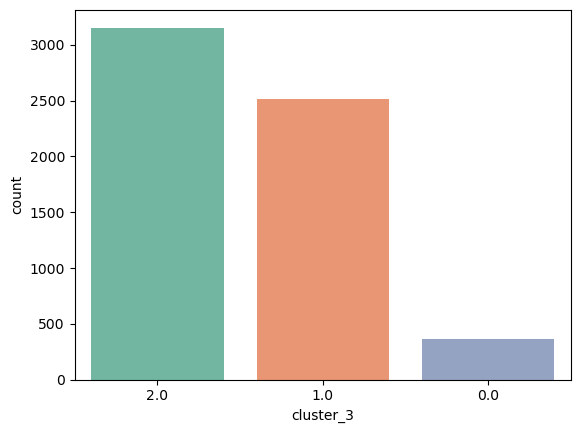

In [5]:
sns.countplot(x="cluster_3",data=df, palette="Set2", order = df['cluster_3'].value_counts().index)


Los clústeres tienen observaciones diferentes, el clúster dos es el que mayor tiene observaciones, luego el uno y por último el clúster cero.

# Medias por clusters

In [6]:
df.groupby(["cluster_3"]).mean()

,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,antiguedad
cluster_3,,,,,,,,,,,,,,,,,
0.0,1158.841822,0.858205,613.346878,343.134807,270.212072,678.132686,0.462216,0.173602,0.338871,0.110805,2.171271,10.179558,3832.487862,1012.842576,467.887041,0.155120,11.350829
1.0,1209.746046,0.882530,591.891141,320.838537,271.418756,676.233610,0.464597,0.170446,0.342295,0.115406,2.269078,10.048092,3915.509848,1091.494339,515.486880,0.153511,11.452305
2.0,1214.272448,0.878275,625.999616,349.269968,277.003591,689.814286,0.476941,0.181090,0.347319,0.116543,2.287797,10.877655,3869.366503,1118.534829,501.028160,0.154007,11.497940


Como las medias no son medidas tan confiables se analizaran graficos mas adelante apoyados de las medias

# Boxplot


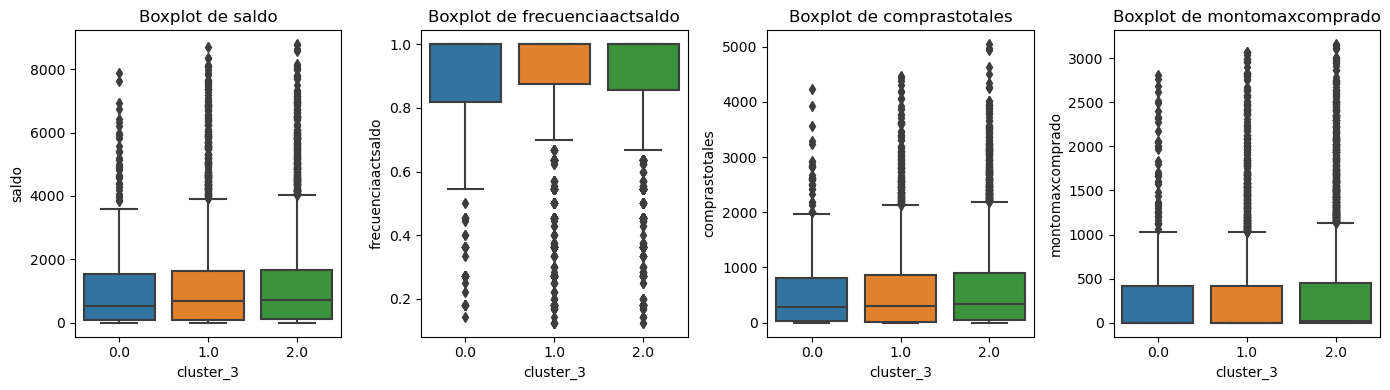

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="saldo", data=df, ax=axes[0])
axes[0].set_title("Boxplot de saldo")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("saldo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="frecuenciaactsaldo", data=df, ax=axes[1])
axes[1].set_title("Boxplot de frecuenciaactsaldo")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("frecuenciaactsaldo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="comprastotales", data=df, ax=axes[2])
axes[2].set_title("Boxplot de comprastotales")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("comprastotales")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="montomaxcomprado", data=df, ax=axes[3])
axes[3].set_title("Boxplot de montomaxcomprado")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("montomaxcomprado")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

El clúster dos son los titulares que más saldo tienen en la cuenta, en los otros dos clúster el saldo se mantiene con cantidad promedio similar, los titulares del clúster 0 son a los que con menos frecuencia se les actualiza el saldo, luego son los del clúster dos y finalmente los del clúster uno, los titulares del clúster uno son los que han comprado con un mayor monto en la tarjeta de crédito, luego el clúster cero y finalmente el clúster dos, esto tiene sentido ya que a mayor número de compras se actualiza con más frecuencia el saldo. Finalmente, los titulares del clúster uno ha gastado un monto mayor en una sola compra a comparación de los otros dos clúster con un promedio de 564 dólares, los otros dos clúster el monto máximo comprado en una sola compra es muy similar, 199 dólares para clúster cero y 188 dólares para clúster dos.

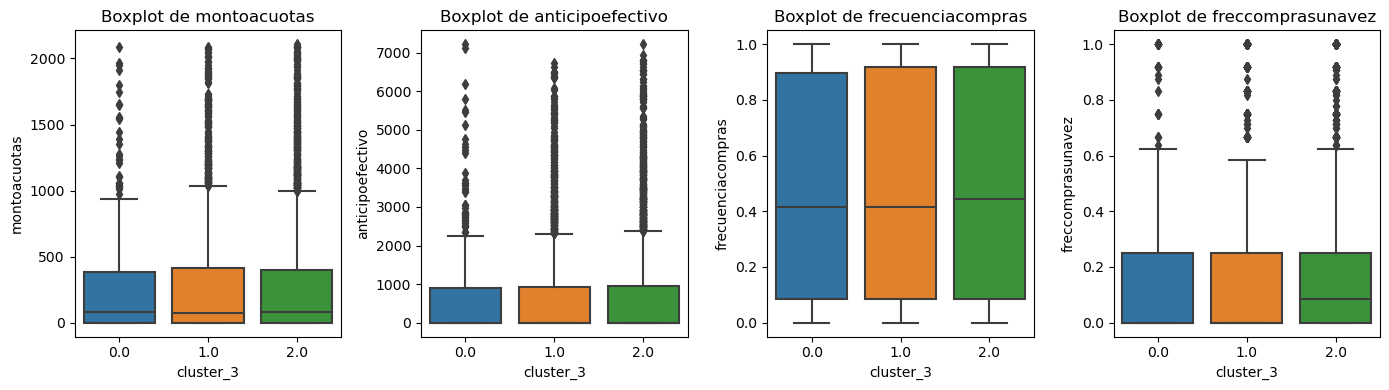

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="montoacuotas", data=df, ax=axes[0])
axes[0].set_title("Boxplot de montoacuotas")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("montoacuotas")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="anticipoefectivo", data=df, ax=axes[1])
axes[1].set_title("Boxplot de anticipoefectivo")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("anticipoefectivo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="frecuenciacompras", data=df, ax=axes[2])
axes[2].set_title("Boxplot de frecuenciacompras")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("frecuenciacompras")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="freccomprasunavez", data=df, ax=axes[3])
axes[3].set_title("Boxplot de freccomprasunavez")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("freccomprasunavez")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

Los titulares del clúster realizan más compras que se pagan con cuotas que los titulares del resto de clústeres, además los titulares del clúster cero realizan más compras que se pagan a cuotas que los titulares del clúster dos, por otro parte los titulares del clúster cero y dos han realizado un anticipo de efectivo similar alrededor de los 1000 dólares, los titulares del clúster uno son los que han anticipado menor dinero. los titulares del clúster uno son los que compran frecuentemente con la tarjeta, luego los del clúster cero y finalmente los del clúster dos, además los titulares del clúster uno se realiza con mayor frecuencia compras de un solo pago que el resto de clúster, los otros titulares de los clústeres tienen una menor frecuencia de compra de un solo pago.

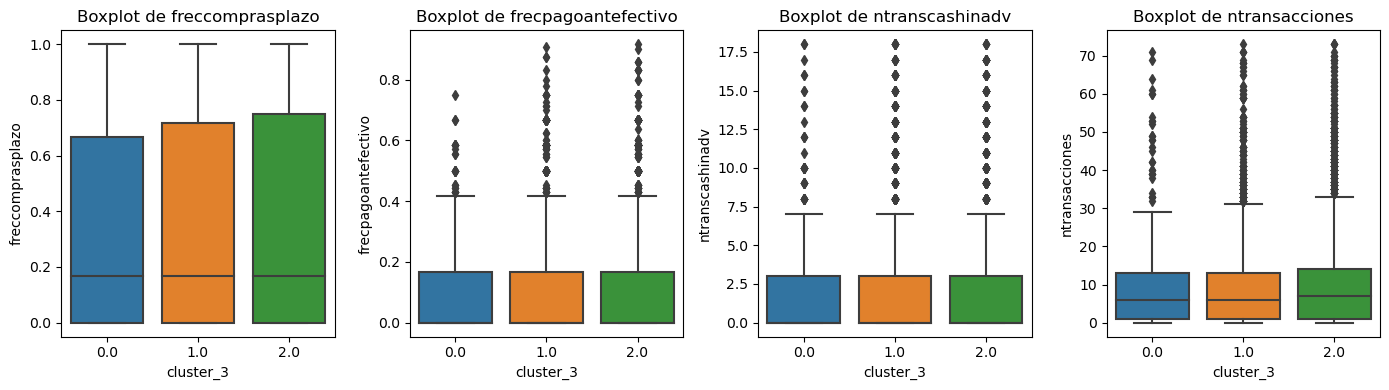

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="freccomprasplazo", data=df, ax=axes[0])
axes[0].set_title("Boxplot de freccomprasplazo")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("freccomprasplazo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="frecpagoantefectivo", data=df, ax=axes[1])
axes[1].set_title("Boxplot de frecpagoantefectivo")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("frecpagoantefectivo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="ntranscashinadv", data=df, ax=axes[2])
axes[2].set_title("Boxplot de ntranscashinadv")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("ntranscashinadv")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="ntransacciones", data=df, ax=axes[3])
axes[3].set_title("Boxplot de ntransacciones")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("ntransacciones")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

Los titulares del clúster uno, compran frecuentemente a cuotas a comparación de los otros dos clústeres, luego los del clúster cero y finalmente los del clúster dos, esto es debido a que el clúster uno se realizan más compras. Los titulares del clúster cero son los que con mayor frecuencia realizan anticipos de efectivo, luego los del clúster dos y finalmente los del clúster uno, así mismo los titulares del clúster dos han realizado mayores transacciones de anticipo de efectivo, luego los del clúster cero y finalmente los del clúster uno, es importe resaltar que la contradicción anterior es porque los clústeres cero y dos en ambas graficas tiene un comportamiento similar. Finalmente, los titulares del clúster uno han realizado mayor número de transacciones a comparación de los otros dos clúster, luego los titulares del clúster cero con 5 en promedio y finalmente los del clúster dos con 3 transacciones aproximadamente.

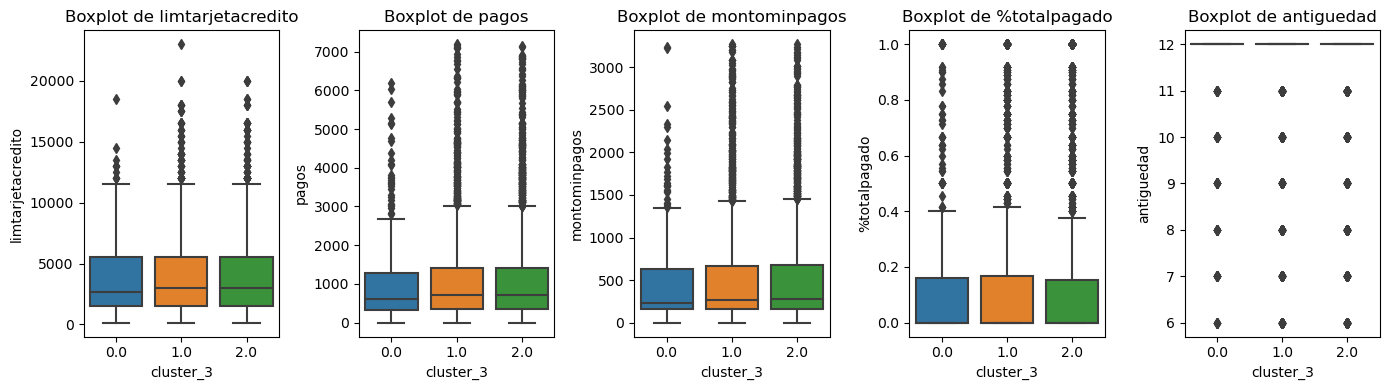

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="limtarjetacredito", data=df, ax=axes[0])
axes[0].set_title("Boxplot de limtarjetacredito")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("limtarjetacredito")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="pagos", data=df, ax=axes[1])
axes[1].set_title("Boxplot de pagos")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("pagos")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="montominpagos", data=df, ax=axes[2])
axes[2].set_title("Boxplot de montominpagos")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("montominpagos")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="%totalpagado", data=df, ax=axes[3])
axes[3].set_title("Boxplot de %totalpagado")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("%totalpagado")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="antiguedad", data=df, ax=axes[4])
axes[4].set_title("Boxplot de antiguedad")
axes[4].set_xlabel("cluster_3")
axes[4].set_ylabel("antiguedad")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

Los titulares del clúster uno tienen un mayor limite en la tarjeta de crédito, luego los del clúster dos y finalmente los del clúster cero, por otra parte los titulares del clúster uno son los que más han pagado a su tarjeta, luego los del clúster dos y por ultimo los del clúster cero. Los titulares del clúster dos son los que deben de pagar un monto mínimo mayor a su tarjeta de crédito, seguido por los titulares de clúster uno y finalmente los titulares del clúster cero. Los titulares del clúster uno son lo que han pagado un mayor porcentaje de su deuda, seguido por los titulares del clúster cero y por ultimo los del clúster dos, quienes en promedio han pagado un solo 5%. Finalmente, los titulares de clúster uno y dos son los más antiguos con el uso de la tarjeta de crédito con un promedio alrededor 11,8 años, en mayor medida los del clúster uno, los del clúster cero tienen en promedio con la tarjeta de crédito 7,4 años.

# Histogramas

In [12]:
pal=['autumn','cool','magma','spring','winter']

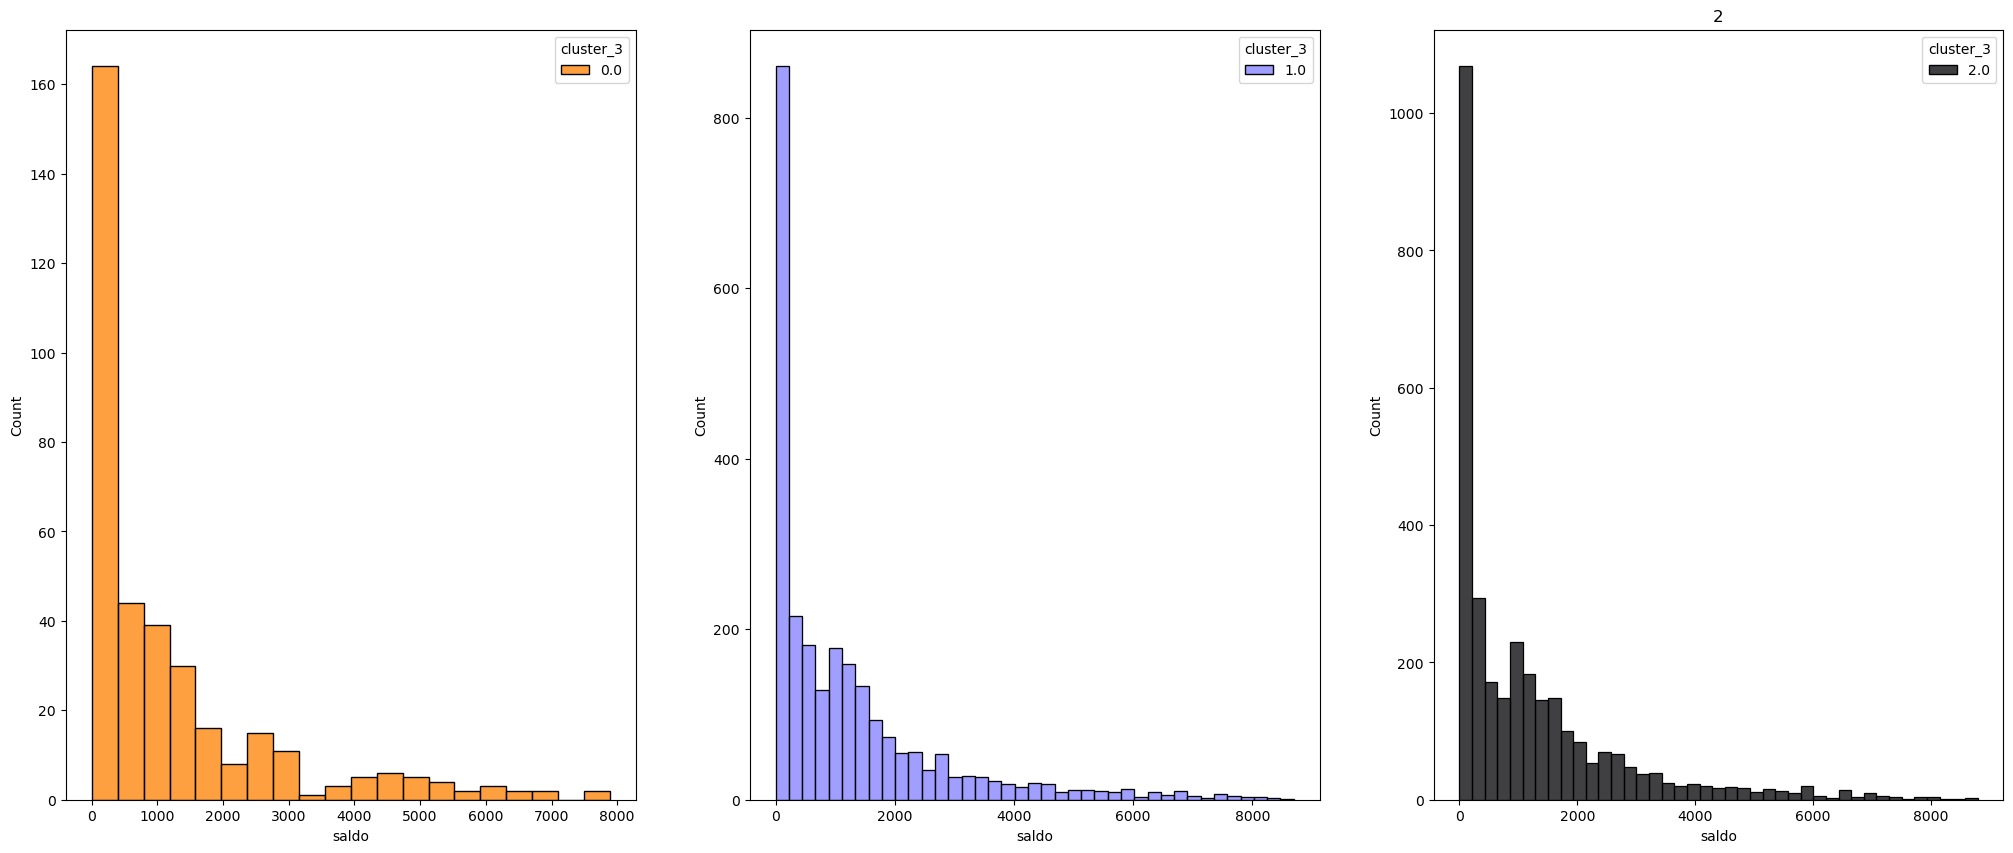

In [14]:
# Análisis de saldo
temp_saldo = df[['cluster_3','saldo']]
fig,axs=plt.subplots(ncols=3,figsize =(25, 10))

for i in list(range(0,3)):
    plt.title(i)
    sns.histplot(data=temp_saldo[temp_saldo.cluster_3==i],x='saldo',hue='cluster_3',palette=pal[i],ax=axs[i],multiple='dodge')
    

Las titulares del clúster dos tienen mayor saldo, luego los del clúster uno y finalmente los del clúster cero, sus distribuciones son similares, las tres graficas son tienen una asimetría positiva, es decir están sesgadas hacia la derecha. Además, existen titulares que pueden tener en sus tarjetas más de 6000 dólares de saldo para los tres clústeres.


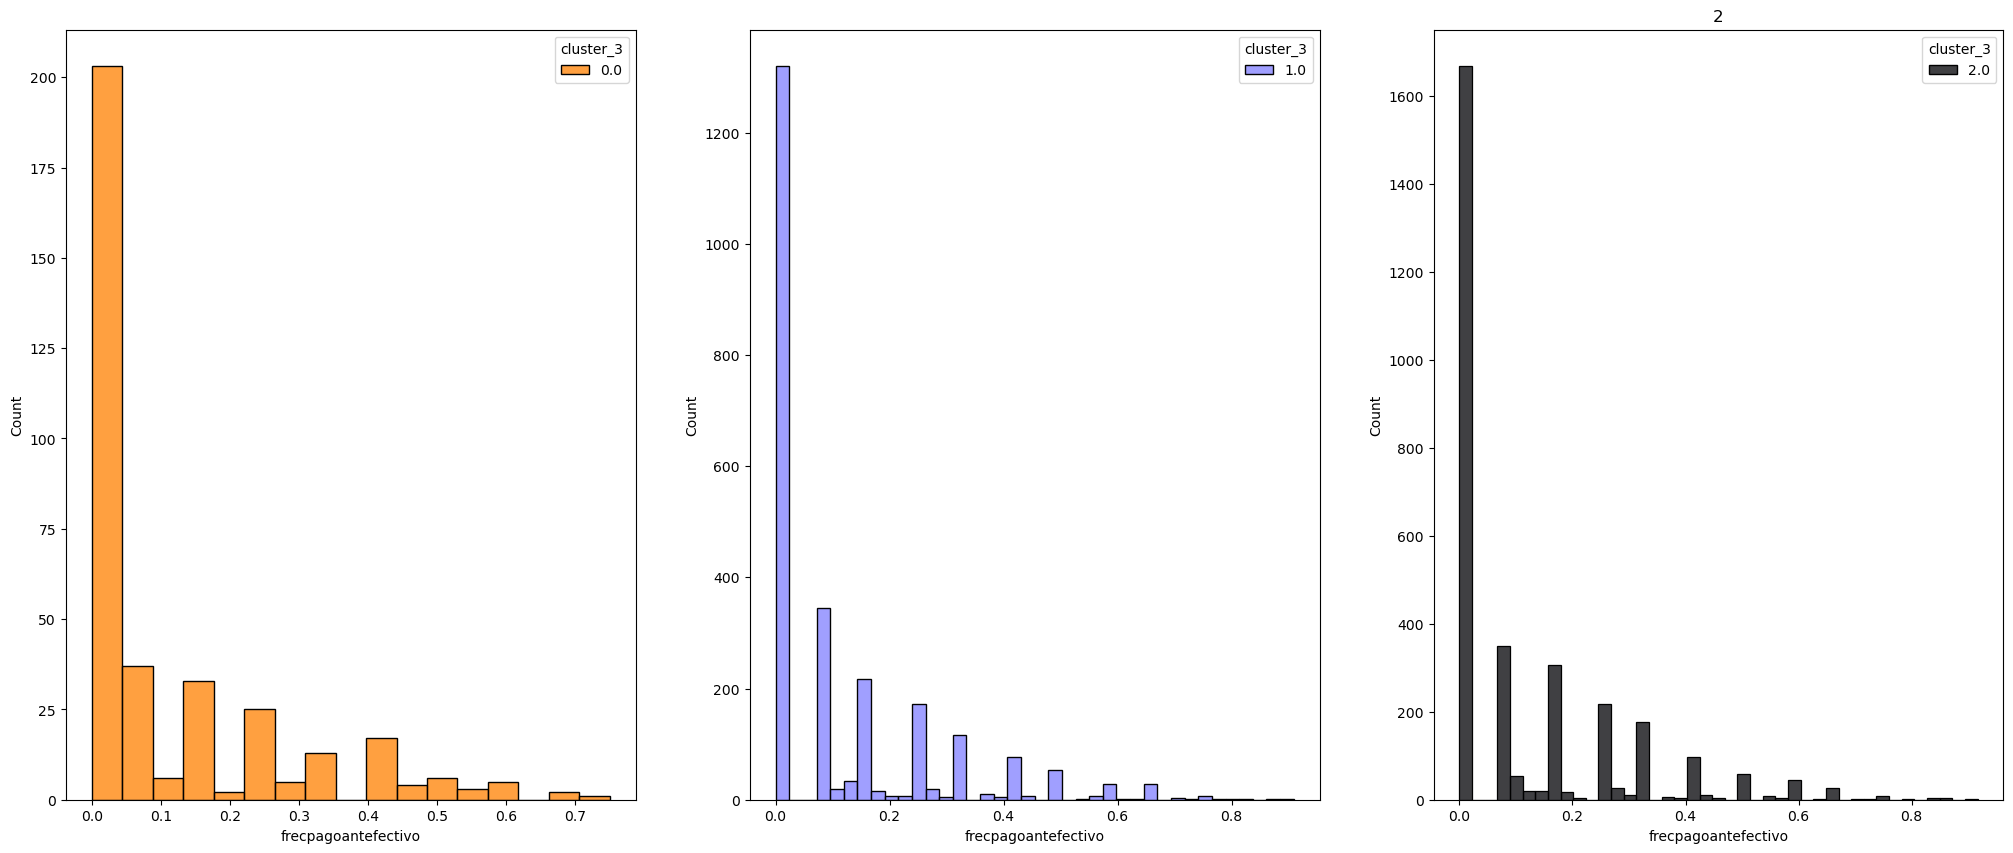

In [15]:
#Análsis de aticipo efectivo
temp_anticipoefec = df[['cluster_3','frecpagoantefectivo']]
fig,axs=plt.subplots(ncols=3,figsize =(25, 10))

for i in list(range(0,3)):
    plt.title(i)
    sns.histplot(data=temp_anticipoefec[temp_anticipoefec.cluster_3==i],x='frecpagoantefectivo',hue='cluster_3',palette=pal[i],ax=axs[i],multiple='dodge')
    

La frecuencia del dinero anticipado en efectivo es mayor por los titulares del clúster cero, luego los titulares del clúster dos y finalmente para el clúster uno, en la gráfica se observa cómo hay más personas en el clúster cero que anticipan con mayor frecuencia dinero en efectivo.

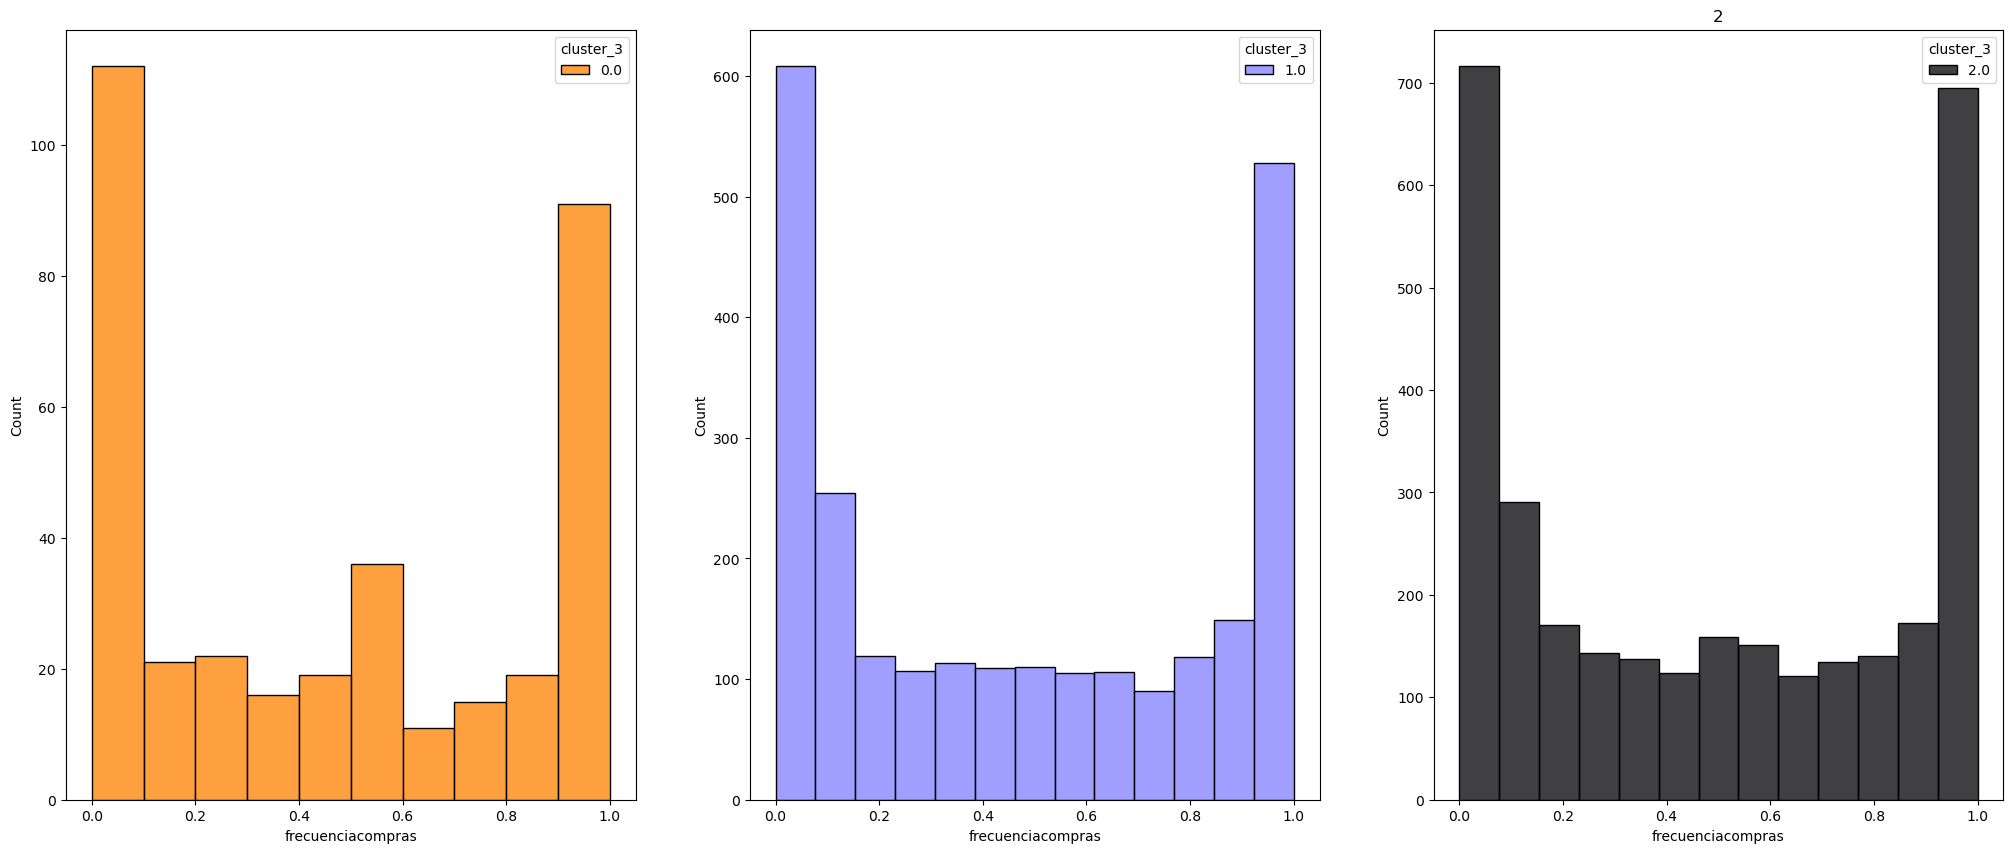

In [16]:
# Análisis de compras totales
temp_compras = df[['cluster_3','frecuenciacompras']]
fig,axs=plt.subplots(ncols=3,figsize =(25, 10))

for i in list(range(0,3)):
    plt.title(i)
    sns.histplot(data=temp_compras[temp_compras.cluster_3==i],x='frecuenciacompras',hue='cluster_3',palette=pal[i],ax=axs[i],multiple='dodge')
    

Los titulares del clúster uno son los que realizan frecuentemente mayores compras, luego los del clúster cero y finalmente los del clúster dos. En el clúster cero existe gran variedad de clientes con diferentes frecuencias en compras, los titulares del clúster dos son los que compran con menor frecuencia.

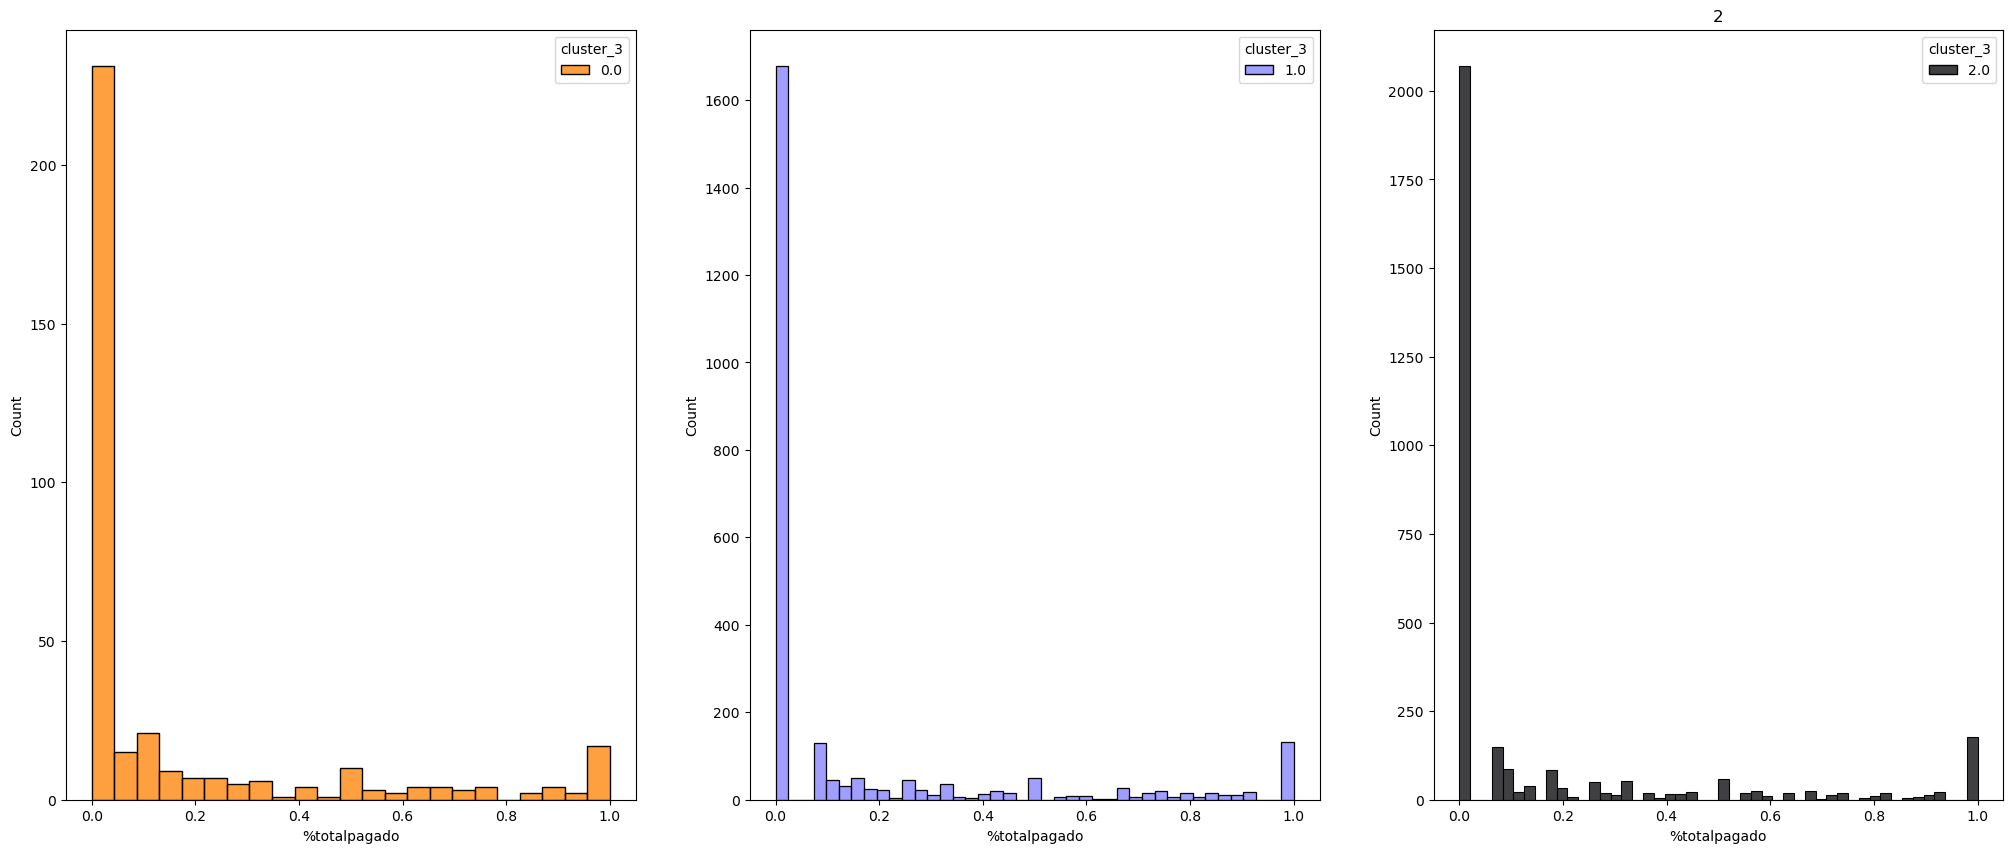

In [17]:
# Análisis de pagos
temp_pagos = df[['cluster_3','%totalpagado']]
fig,axs=plt.subplots(ncols=3,figsize =(25, 10))

for i in list(range(0,3)):
    plt.title(i)
    sns.histplot(data=temp_pagos[temp_pagos.cluster_3==i],x='%totalpagado',hue='cluster_3',palette=pal[i],ax=axs[i],multiple='dodge')
    

Los titulares del clúster uno son los que han pagado en mayor porcentaje su deuda con la tarjeta de crédito, seguidos por los titulares del clúster cero y por ultimo los del clúster dos. En los tres clústeres los titulares tienen el mismo comportamiento, se observa que un número mayor de titulares han pagado poco porcentaje de su deuda.

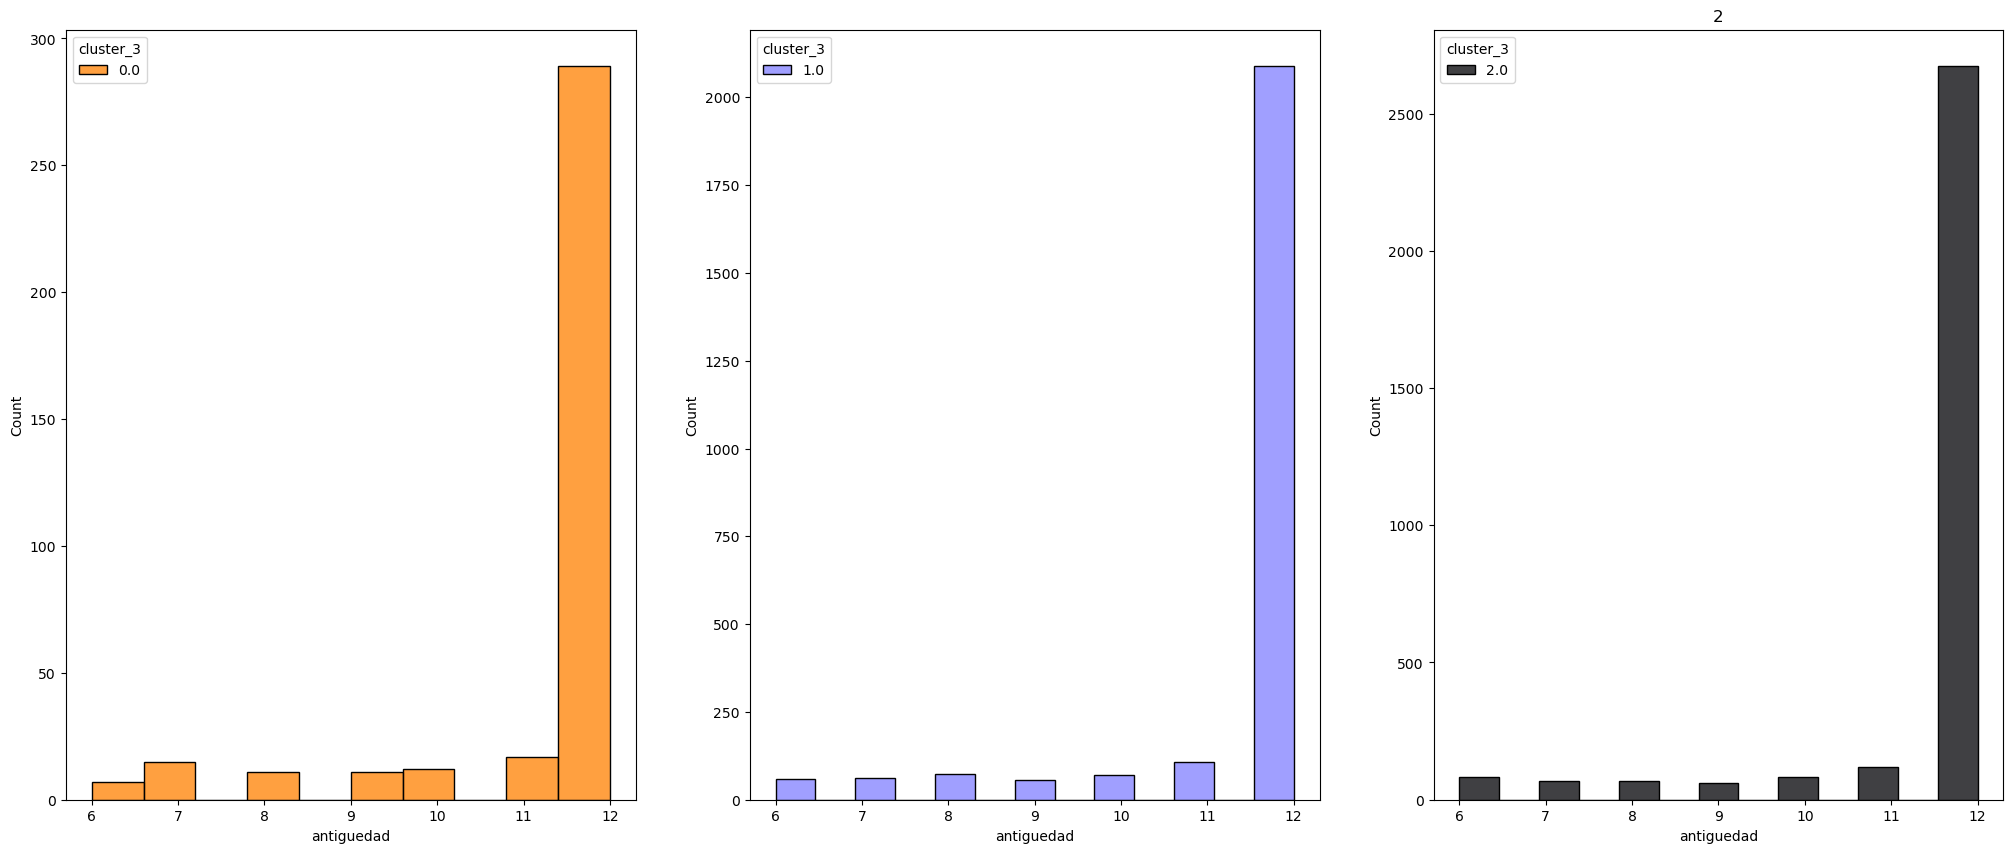

In [18]:
# Análisis de pagos
temp_pagos = df[['cluster_3','antiguedad']]
fig,axs=plt.subplots(ncols=3,figsize =(25, 10))

for i in list(range(0,3)):
    plt.title(i)
    sns.histplot(data=temp_pagos[temp_pagos.cluster_3==i],x='antiguedad',hue='cluster_3',palette=pal[i],ax=axs[i],multiple='dodge')
    

Los titulares del clúster uno y dos tiene similitud en el comportamiento de la antigüedad de sus titulares, en mayor medida para ambos sus titulares tienen más de 10 años con la tarjeta. En el clúster cero sus titulares en su mayoría tienen menos de 10 años con la tarjeta y en mayor cantidad se encuentran entre 6 y 6.5 años.

# Resumen

Clúster 0: Menor capacidad adquisitiva, jóvenes para la empresa, moderadamente utilización de anticipo de dinero en efectivo.

Este tipo de titulares son los que menos saldo tiene en sus tarjetas, ya que tienen un límite de saldo menor y realizan compras de forma moderada, por lo tanto, el monto mínimo de pago requerido es menor y sacan sus compras a cuotas de forma mesurada. Estos titulares llevan menos tiempo con su tarjeta de crédito, con aproximadamente 7.8 años. Por último, son los titulares que anticipan moderadamente dinero en efectivo.

Clúster 1: utilización mayor en compras en crédito y de un solo pago, poco anticipo de dinero.

Este tipo de titulares son los que más compras realizan con la tarjeta de crédito y por lo tanto tienen un saldo intermedio en sus tarjetas de créditos frente a los demás clústeres, ya que tienen un límite mayor en sus tarjetas de créditos, además, tiene una alta antigüedad lo que genera confianza al prestador de la tarjeta de crédito. Estos tienen un mayor porcentaje de su deuda pagada y por lo tanto tienen un monto mínimo de pago bajo, además, estos titulares son los que con un mayor monto y frecuentemente sacan sus compras a plazo, pero pocas veces realizan anticipo de efectivo.

Clúster 2: mayor anticipo de efectivo, poca utilización de la tarjeta, poco pago.

Estos usuarios llevan muchos años con la tarjeta de crédito, pero casi no realizan compras, estos utilizan su tarjeta en mayor medida para realizar avances de dinero, además, no les gusta endeudarse con la tarjeta, pero tampoco tienen menor porcentaje de la deuda pagada por lo que tienen un monto mínimo a pagar más alto. Además, tienen buen limite en la tarjeta de crédito, lo que demuestra confianza por parte del banco. Por último, casi no compran a cuotas y tampoco de un solo pago.


